In [56]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import matplotlib.pyplot as plt
import glob

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

def plot_generate(filename):
    print(filename)
    df = pd.read_csv(filename)

    csi_column = df.iloc[:, 25]
    csi_data = csi_column.apply(lambda x: list(map(int, re.findall(r'-?\d+', str(x)))))

    window_size = 64
    num_rows, num_columns = df.shape

    heatmap_list = []
    append_checker = True
    for i in range(num_rows - window_size + 1):
        window = csi_data.iloc[i:i + window_size]
        for x in window:
            if len(x) == 0:
                append_checker = False
        if append_checker:
            heatmap_list.append(window.values)

    try:
        heatmap_stack = np.array(np.stack(heatmap_list[510:515]).tolist())
        std_heatmap = np.std(heatmap_stack, axis=0)

        plt.figure(figsize=(10, 6))
        sns.heatmap(std_heatmap, cmap='viridis')

        plt.xlabel('CSI Columns (1-128)', fontsize=14)  # Increase font size for x-axis
        plt.ylabel('Time (Rows in Window)', fontsize=14)  # Increase font size for y-axis
        plt.title('Final Heatmap of Standard Deviation Across Sliding Windows', fontsize=16, fontweight='bold')  # Increase font size for title

        # Set the number of ticks
        num_x_ticks = 16  # Adjust to your preference
        num_y_ticks = 8   # Adjust to your preference

        plt.xticks(ticks=np.linspace(0, std_heatmap.shape[1] - 1, num_x_ticks).astype(int), 
                   labels=np.linspace(1, 128, num_x_ticks).astype(int), fontsize=12)  # Adjust step as needed
        plt.yticks(ticks=np.linspace(0, std_heatmap.shape[0] - 1, num_y_ticks).astype(int), 
                   labels=np.arange(0, std_heatmap.shape[0], step=8), fontsize=12)  # Adjust step as needed

        plt.show()
    except Exception as e:
        print(f"Error: {e}")
        return


csi_data_boxing_1.csv


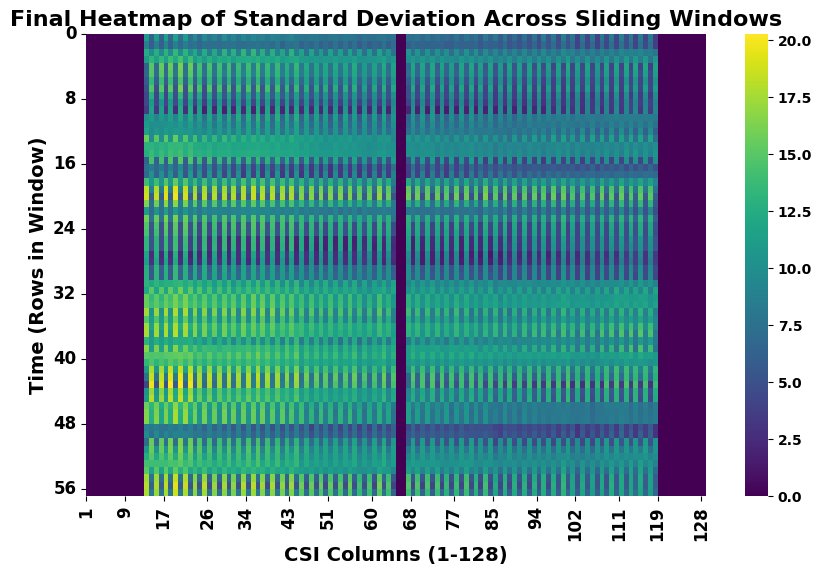

csi_data_boxing_2.csv


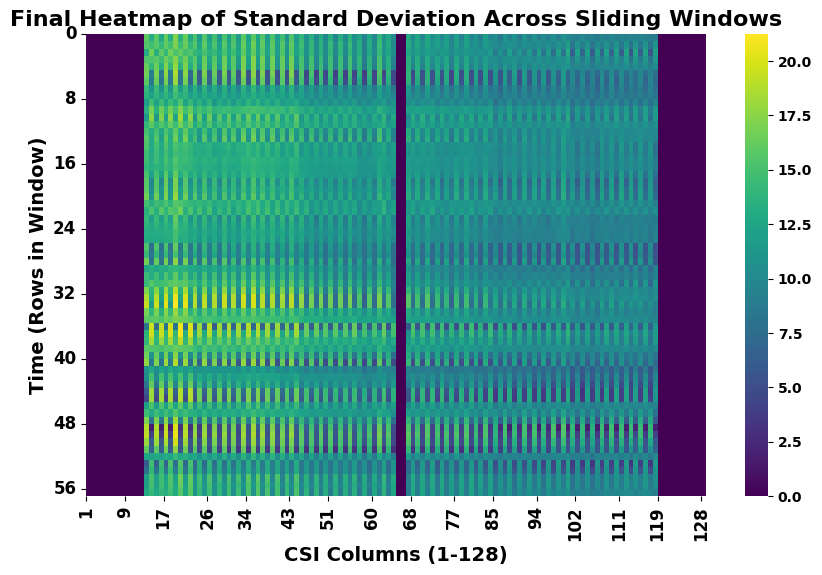

csi_data_empty_room.csv
Error: need at least one array to stack
csi_data_empty_room_2.csv


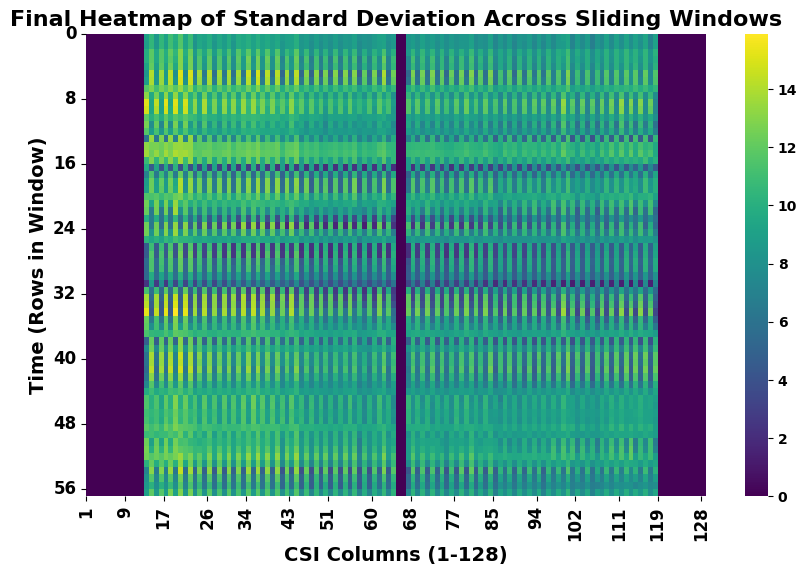

csi_data_jumping_1.csv
Error: need at least one array to stack
csi_data_jumping_2.csv


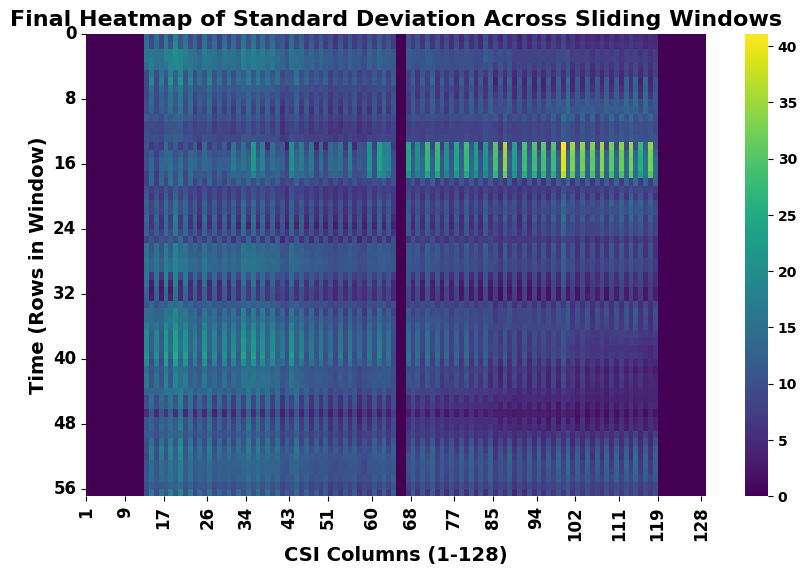

csi_data_jumping_jacks_1.csv


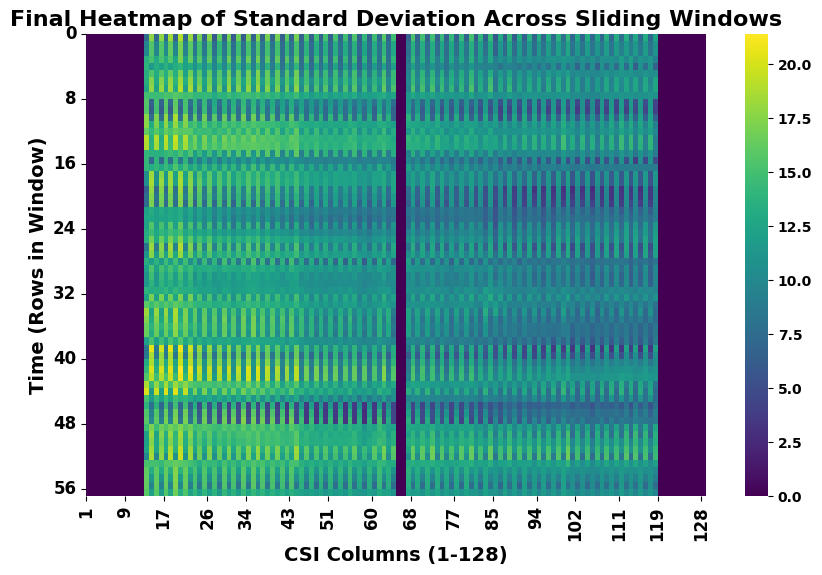

csi_data_jumping_jacks_2.csv
Error: need at least one array to stack
csi_data_squats_1.csv


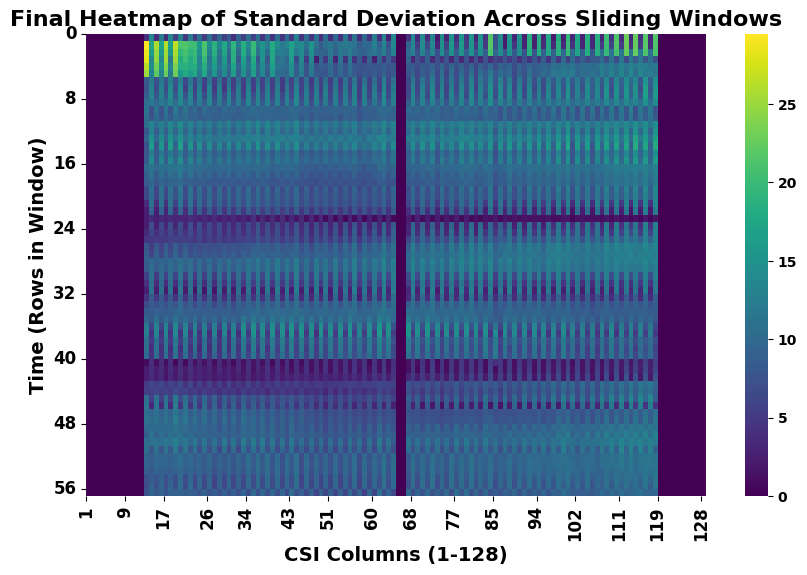

csi_data_squats_2.csv
Error: need at least one array to stack
csi_data_walking_1.csv
Error: need at least one array to stack
csi_data_walking_2.csv


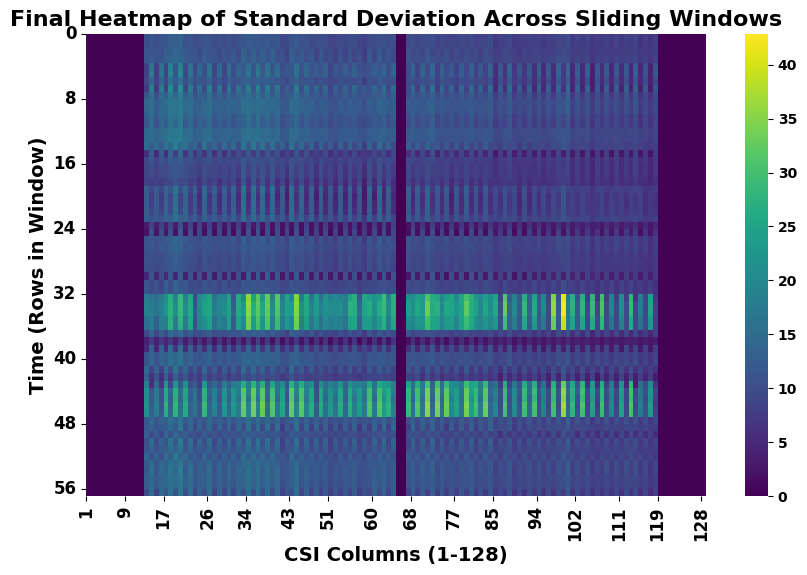

In [57]:
files = glob.glob('*.csv')
for file in files:
    plot_generate(file)